In this notebook, we will visualise the trend of the derived measures over time

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import pyreadstat as pyrs
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Optional
import warnings
warnings.filterwarnings('ignore')
#set no limits on data display
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('use_inf_as_na', True)
#getting the work directory
import os 
cwd = os.getcwd()
print(cwd)

C:\Users\OMEN\Anaconda3 Files


In [2]:
# Importing data

df_measures = pd.read_csv('UK LCF Data Set Clean/inequality_measures.csv')
df_ci = pd.read_csv('UK LCF Data Set Clean/confidence_intervals.csv')

print('DF of measures \n' + '='*50)
print(df_measures.head())
print('\n DF of confidence intervals \n' + '='*50)
print(df_ci.head())

DF of measures 
   Year  avg_income_overall  90/10_ratio_income_overall  \
0  2016         1006.277011                        4.49   
1  2017         1035.743265                        4.81   
2  2018         1025.441813                        4.60   
3  2019         1079.703580                        4.37   
4  2020         1110.322901                        4.42   

   log_var_income_overall  avg_consumption_overall  \
0                0.329679               169.668904   
1                0.365085               173.455859   
2                0.358912               154.643541   
3                0.327387               147.320048   
4                0.319978                86.888968   

   log_var_consumption_overall  avg_income_wfh  90/10_ratio_income_wfh  \
0                     1.341467     1156.409845                    4.00   
1                     1.367597     1219.199715                    4.40   
2                     1.495767     1268.296132                    3.60   
3       

In [3]:
print('Columns available in df_measures \n' + '='*50)
print(df_measures.columns)
print('\n Columns available in df_ci \n' + '='*50)
print(df_ci.columns)

Columns available in df_measures 
Index(['Year', 'avg_income_overall', '90/10_ratio_income_overall',
       'log_var_income_overall', 'avg_consumption_overall',
       'log_var_consumption_overall', 'avg_income_wfh',
       '90/10_ratio_income_wfh', 'log_var_income_wfh', 'avg_consumption_wfh',
       'log_var_consumption_wfh', 'avg_income_non_wfh',
       '90/10_ratio_income_non_wfh', 'log_var_income_non_wfh',
       'avg_consumption_non_wfh', 'log_var_consumption_non_wfh'],
      dtype='object')

 Columns available in df_ci 
Index(['Year', 'avg_income_ci_lower_overall', 'avg_income_ci_upper_overall',
       '90/10_ratio_income_ci_lower_overall',
       '90/10_ratio_income_ci_upper_overall',
       'log_var_income_ci_lower_overall', 'log_var_income_ci_upper_overall',
       'avg_consumption_ci_lower_overall', 'avg_consumption_ci_upper_overall',
       'log_var_consumption_ci_lower_overall',
       'log_var_consumption_ci_upper_overall', 'avg_income_ci_lower_wfh',
       'avg_income_ci_

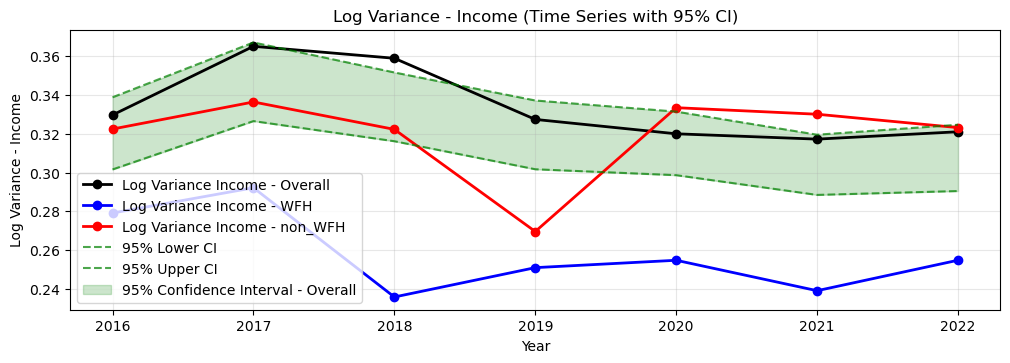

In [16]:
# Create visualization
plt.figure(figsize=(12, 8))

# Plot 1: Time series with confidence interval
plt.subplot(2, 1, 1)
years = df_measures['Year']
log_var_income_overall = df_measures['log_variance_income_overall']
log_var_income_wfh = df_measures['log_variance_income_wfh']
log_var_income_non_wfh = df_measures['log_variance_income_non_wfh']
ci_lower_log_var_income = df_ci['log_var_income_ci_lower_overall']
ci_upper_log_var_income = df_ci['log_var_income_ci_upper_overall']
###

# Plot the measures
plt.plot(years, log_var_income_overall, 'bo-', linewidth=2, markersize=6, label='Log Variance Income - Overall', color = 'black')
plt.plot(years, log_var_income_wfh, 'bo-', linewidth=2, markersize=6, label='Log Variance Income - WFH', color = 'blue')
plt.plot(years, log_var_income_non_wfh, 'bo-', linewidth=2, markersize=6, label='Log Variance Income - non_WFH', color = 'red')

# Plot the confidence intervals
plt.plot(years, ci_lower_log_var_income , color='green', linestyle='--', alpha=0.7,
            label='95% Lower CI')
plt.plot(years, ci_upper_log_var_income, color='green', linestyle='--', alpha=0.7,
            label='95% Upper CI')
plt.fill_between(years, ci_lower_log_var_income, ci_upper_log_var_income,
                 alpha=0.2, color='green', label='95% Confidence Interval - Overall')

plt.title('Log Variance - Income (Time Series with 95% CI)')
plt.xlabel('Year')
plt.ylabel('Log Variance - Income')
plt.legend()
plt.grid(True, alpha=0.3)

In [4]:
def generate_graph (measures, ci, measure_name , measure_wfh = False, ci_measure = None, title=None, figsize=(12, 10)):
    """
    Create a graph of the measures with confidence intervals.
    
    Parameters:
    -----------
    measures : pandas.DataFrame
        DataFrame containing the time series data
    ci : pandas.DataFrame
        DataFrame containing the confidence intervals data
    measure_name: str
        name of measure to graph
    title: str
        Title of graph
    fig_size: tuple
        size of graph (width, height)
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Create visualization
    plt.figure(figsize=figsize)
    
    # Plot 1: Time series with confidence interval
    plt.subplot(2, 1, 1)
    # Define variables
    years = measures['Year'] # will be used as x-axis
    measure_overall = measure_name + '_overall' # take the generic name and adjust to specific column name
    measure_overall_1 = measures[measure_overall]
    if measure_wfh is not False:
        measure_wfh = measure_name + '_wfh' # take the generic name and adjust to specific column name
        measure_non_wfh = measure_name + '_non_wfh' # take the generic name and adjust to specific column name
        measure_wfh_1 = measures[measure_wfh]
        measure_non_wfh_1 = measures[measure_non_wfh]

    ci_lower = measure_name + '_ci_lower_' + ci_measure # take the generic name and adjust to specific column name
    ci_upper = measure_name + '_ci_upper_' + ci_measure # take the generic name and adjust to specific column name
    ci_lower_1 = ci[ci_lower]
    ci_upper_1 = ci[ci_upper]
    ###
    
    # Plot the measures
    plt.plot(years, measure_overall_1, 'bo-', linewidth=2, markersize=6, label= measure_overall, color = 'black')
    if measure_wfh is not None:
        plt.plot(years, measure_wfh_1, 'bo-', linewidth=2, markersize=6, label= measure_wfh, color = 'blue')
    
    if measure_non_wfh is not None:
        plt.plot(years, measure_non_wfh_1, 'bo-', linewidth=2, markersize=6, label= measure_non_wfh, color = 'red')
    
    # Plot the confidence intervals
    plt.plot(years, ci_lower_1 , color='green', linestyle='--', alpha=0.7,
                label='95% Lower CI')
    plt.plot(years, ci_upper_1, color='green', linestyle='--', alpha=0.7,
                label='95% Upper CI')
    plt.fill_between(years, ci_lower_1, ci_upper_1,
                     alpha=0.2, color='green', label='95% CI '+ ci_measure)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(measure_name)
    plt.legend(bbox_to_anchor=(1, 0.1), loc='lower left')
    plt.grid(True, alpha=0.3)

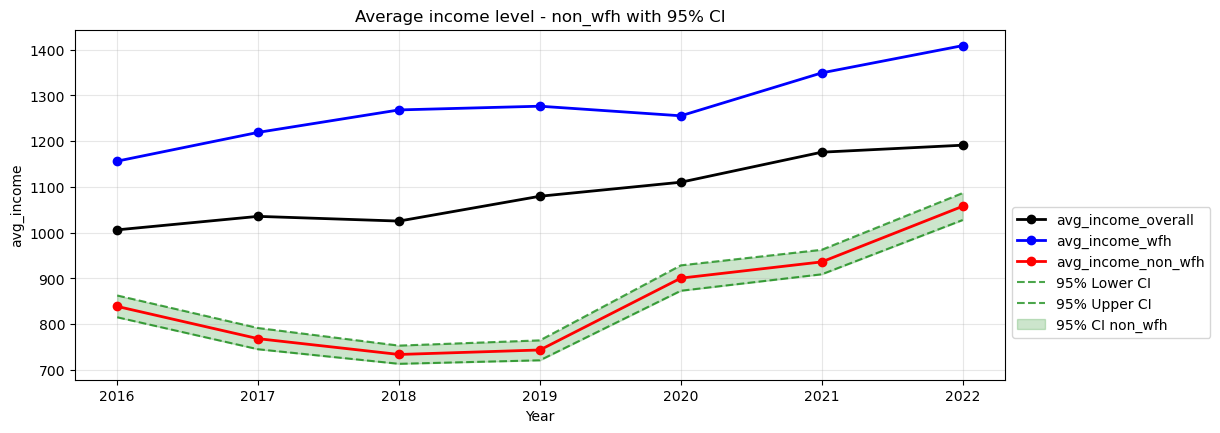

In [7]:
generate_graph (df_measures, df_ci, 'avg_income' , measure_wfh = True, ci_measure = 'non_wfh',
                title='Average income level - non_wfh with 95% CI', figsize=(12, 10))

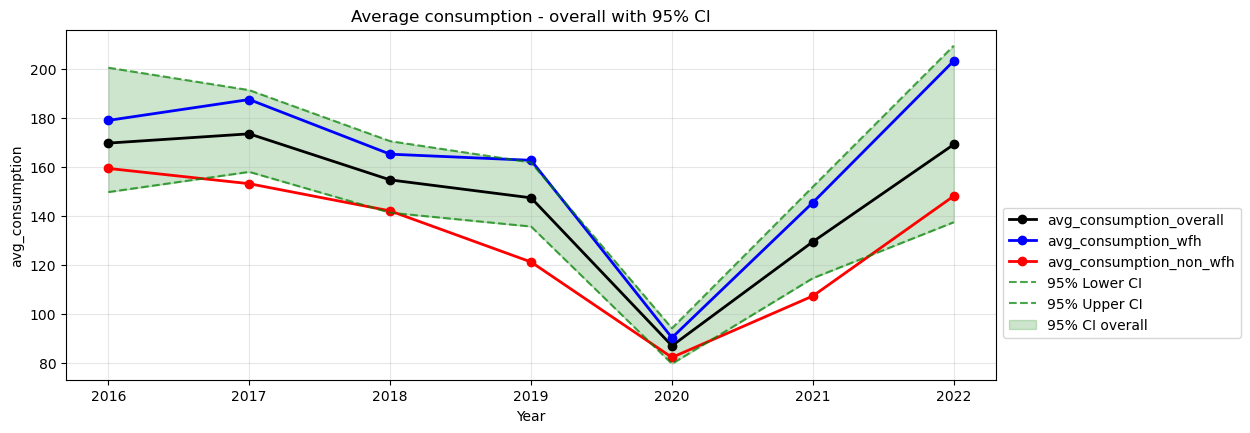

In [171]:
generate_graph (df_measures, df_ci, 'avg_consumption' , measure_wfh = True, ci_measure = 'overall',
                title='Average consumption - overall with 95% CI', figsize=(12, 10))

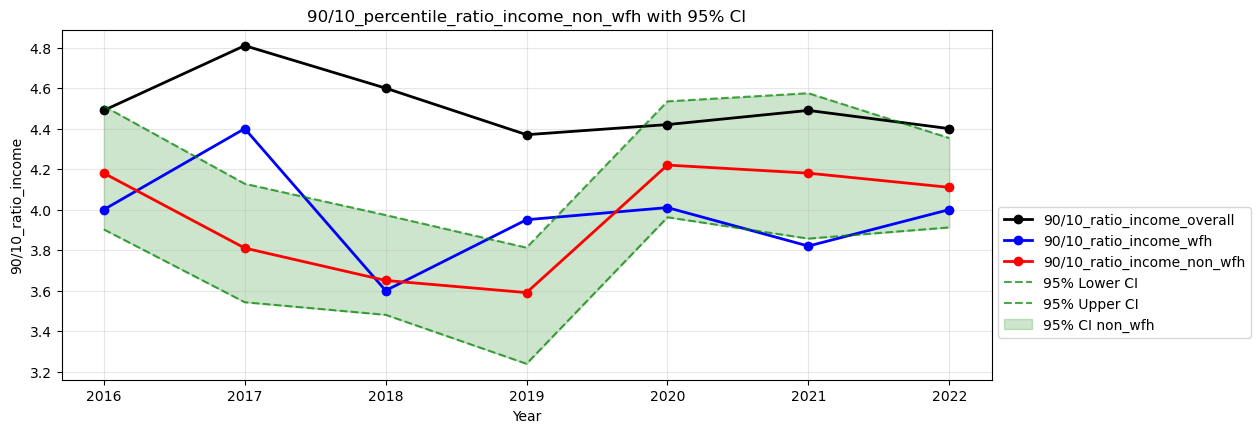

In [152]:
generate_graph (df_measures, df_ci, '90/10_ratio_income' , measure_wfh = True, ci_measure = 'non_wfh',
                title='90/10_percentile_ratio_income_non_wfh with 95% CI', figsize=(12, 10))

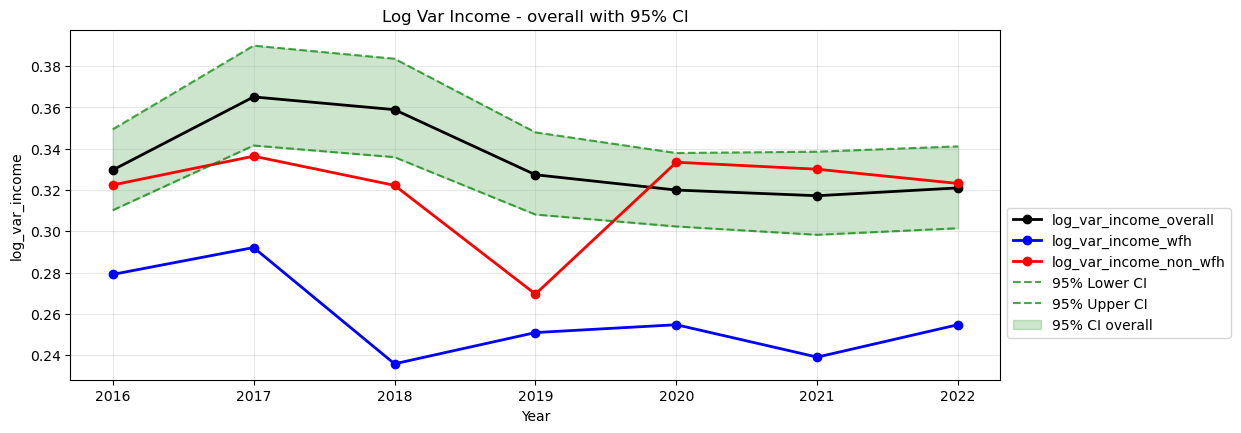

In [169]:
generate_graph (df_measures, df_ci, 'log_var_income' , measure_wfh = True, ci_measure = 'overall',
                title='Log Var Income - overall with 95% CI', figsize=(12, 10))

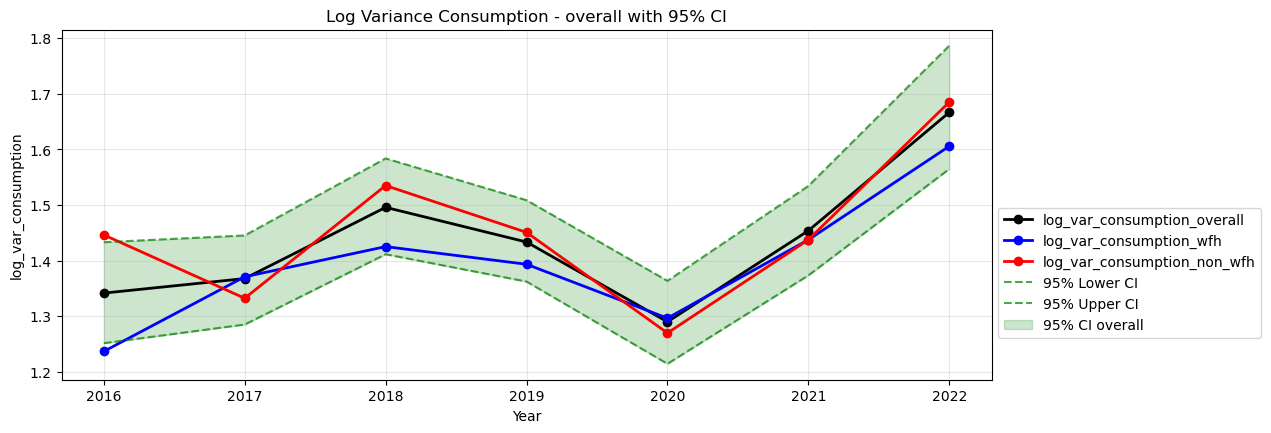

In [170]:
generate_graph (df_measures, df_ci, 'log_var_consumption' , measure_wfh = True, ci_measure = 'overall',
                title='Log Variance Consumption - overall with 95% CI', figsize=(12, 10))